<a href="https://colab.research.google.com/github/NMNayan57/2D-house/blob/main/New_dataset(PHD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [470]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

In [471]:
df=pd.read_csv('/content/prenancy risk status.csv')

In [472]:
df.head(10)

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Status
0,101,Bhavana,20,97.5,91,161,100,24.9,41,5.8,high risk
1,102,Mithila,45,97.7,99,99,94,22.1,36,5.7,high risk
2,103,Phoolan,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,104,Joyonti,26,99.5,135,161,101,23.7,46,4.5,high risk
4,105,Vana,38,102.5,51,106,91,18.8,38,4.3,high risk
5,106,Nishi,21,98.6,85,142,89,22.0,30,5.6,mid risk
6,107,Deshna,23,98.8,70,141,80,18.8,32,5.6,mid risk
7,108,Reshika,38,101.1,141,144,84,24.8,32,5.8,high risk
8,109,Ninika,42,103.5,144,124,83,24.7,35,6.3,high risk
9,110,Rithisha,22,100.1,62,144,92,24.3,46,6.7,high risk


In [473]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Status                             6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [474]:
df.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Status                               0
dtype: int64

In [478]:
df['Status'].value_counts()

high risk    2059
mid risk     2043
low risk     2001
Name: Status, dtype: int64

In [479]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Status


In [480]:
df.Status = le.fit_transform(df.Status.values)
df.Name= le.fit_transform(df.Name.values)

df['Status'].value_counts()

0    2059
2    2043
1    2001
Name: Status, dtype: int64

In [481]:
df.describe()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Status
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,3152.000000,2892.693102,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752,0.997378
std,1761.928678,1669.299673,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327,0.819897
min,101.000000,0.000000,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000,0.000000
25%,1626.500000,1448.500000,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000,0.000000
50%,3152.000000,2886.000000,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000,1.000000
75%,4677.500000,4336.500000,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000,2.000000
max,6203.000000,5793.000000,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000,2.000000


In [482]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()

df1 = pd.DataFrame(stan_scaler.fit_transform(df),columns = df.columns)

In [483]:
df1.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Status
0,-1.731767,-1.452041,-1.005533,-0.732673,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,-1.731199,-0.011199,2.907025,-0.606954,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,-1.730632,0.398587,0.402988,-0.041220,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-1.730064,-0.610901,-0.066519,0.524515,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,-1.729497,1.574626,1.811509,2.410297,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


In [484]:
df1=df1.drop(columns=['Patient ID','Name',])

In [485]:
df1.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Status
0,-1.005533,-0.732673,0.216534,1.844258,1.635224,1.606215,0.703543,0.326150,-1.216567
1,2.907025,-0.606954,0.570113,-1.753531,0.865249,0.308046,-0.432844,0.215684,-1.216567
2,0.402988,-0.041220,-0.092849,-0.012665,-0.033055,-1.129213,0.930820,0.988948,1.222963
3,-0.066519,0.524515,2.161222,1.844258,1.763554,1.049857,1.839930,-1.109913,-1.216567
4,1.811509,2.410297,-1.551365,-1.347329,0.480262,-1.221939,0.021711,-1.330846,-1.216567


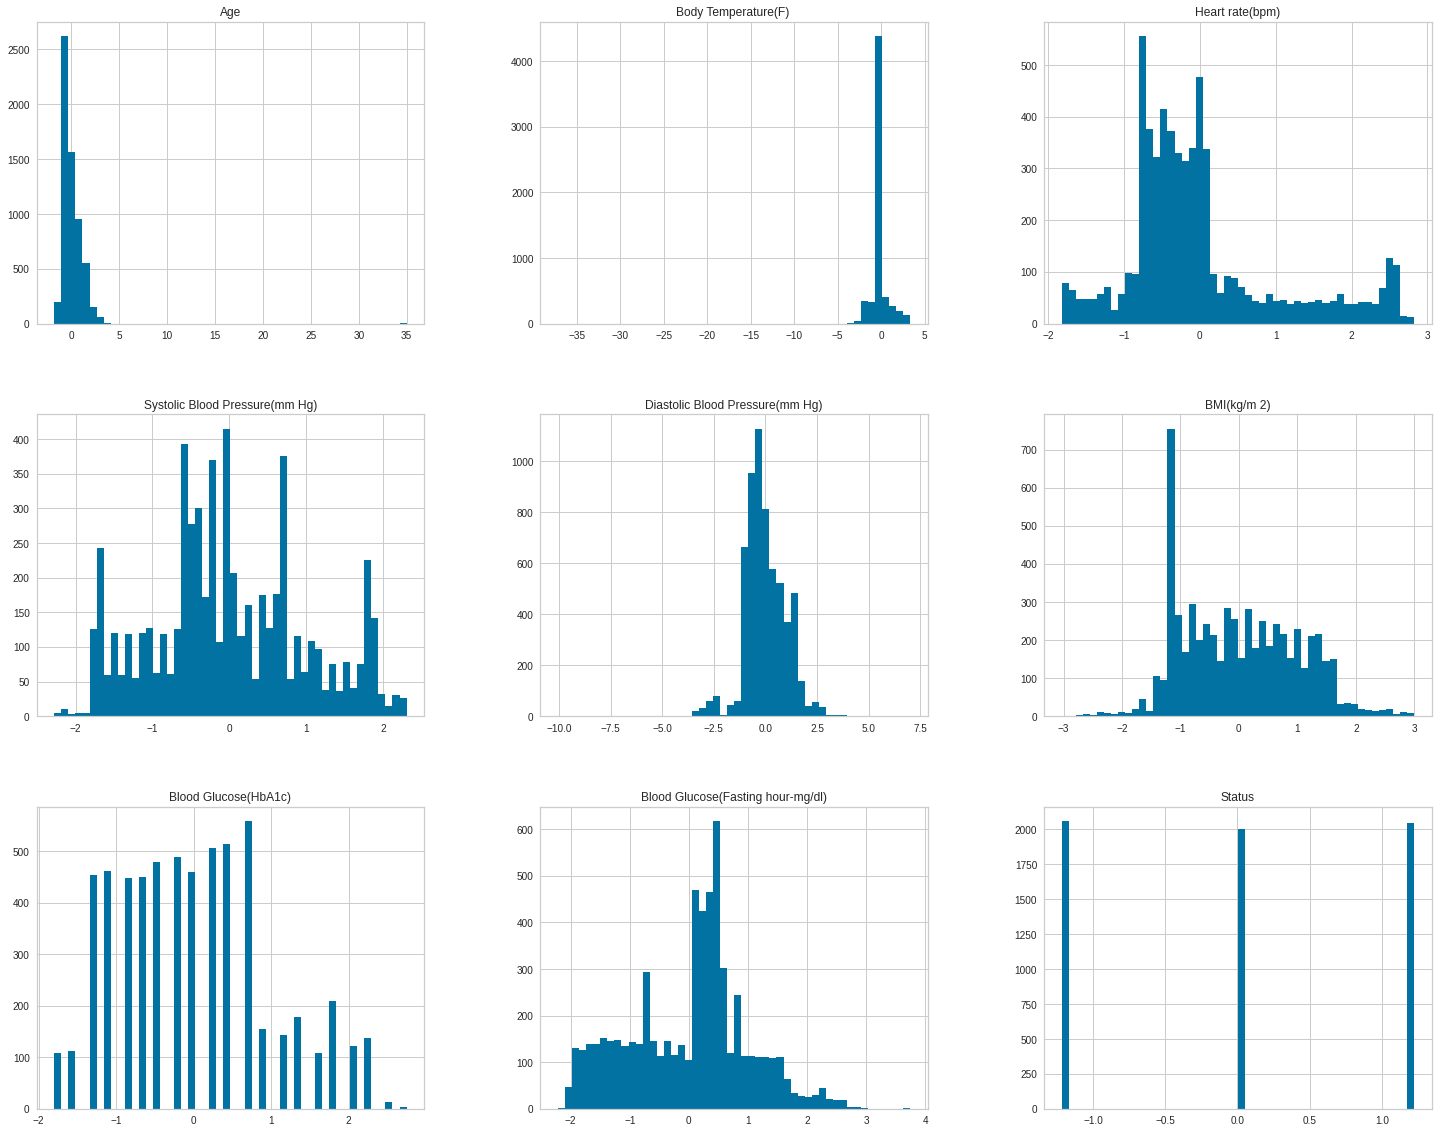

In [486]:
df1.hist(bins=50, figsize=(25, 20))
plt.show()

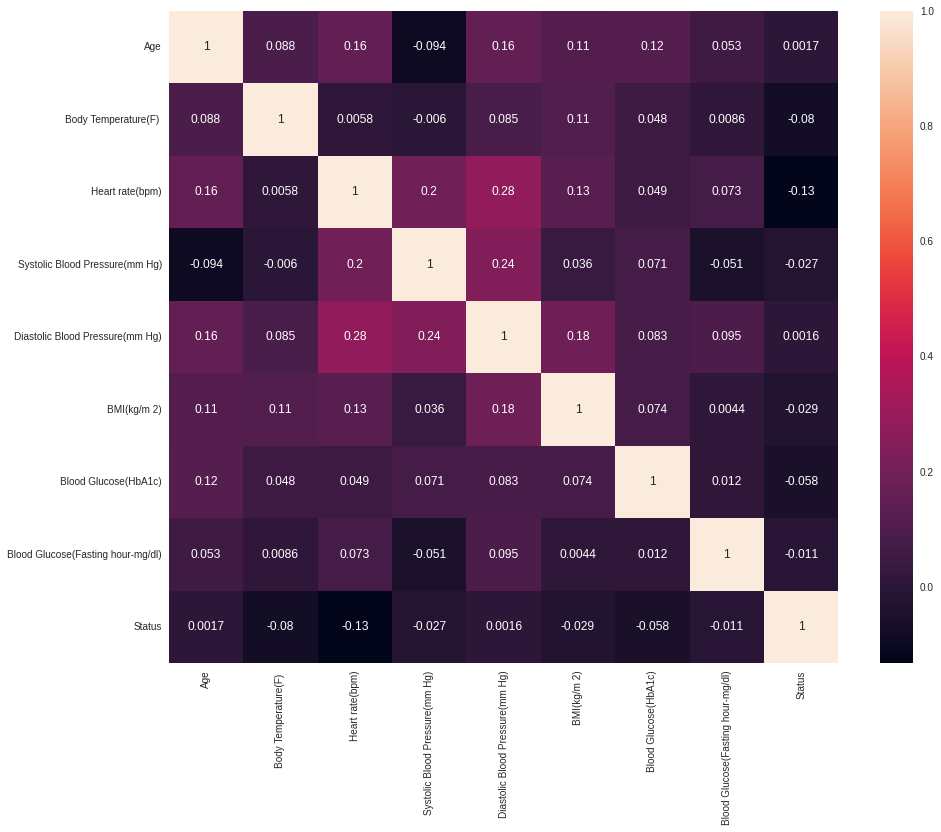

In [487]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [488]:
X = df1.drop( 'Status', axis=1)
y = df1['Status']

y= le.fit_transform(y)


In [489]:
X.shape


(6103, 8)

In [490]:
y.shape

(6103,)

In [491]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [492]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4882, 8)
Number transactions y_train dataset:  (4882,)
Number transactions X_test dataset:  (1221, 8)
Number transactions y_test dataset:  (1221,)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       412
           1       0.99      0.99      0.99       400
           2       0.98      0.98      0.98       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.03931203931203931
msle= 0.01147977670706078
mae= 0.02293202293202293
rmse= 0.19827263883864388
[[405   1   6]
 [  1 396   3]
 [  4   3 402]]


<Axes: >

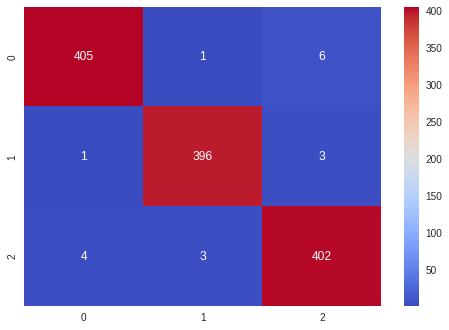

In [493]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions1 = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions1)))



cm=confusion_matrix(y_test, predictions1)
print(cm)


sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')




              precision    recall  f1-score   support

           0       0.97      0.85      0.91       412
           1       0.91      0.99      0.95       400
           2       0.87      0.91      0.89       409

    accuracy                           0.92      1221
   macro avg       0.92      0.92      0.92      1221
weighted avg       0.92      0.92      0.92      1221

mse= 0.2334152334152334
msle= 0.06866578900856893
mae= 0.1334971334971335
rmse= 0.48313065874071104
[[350  10  52]
 [  1 396   3]
 [  9  27 373]]


<Axes: >

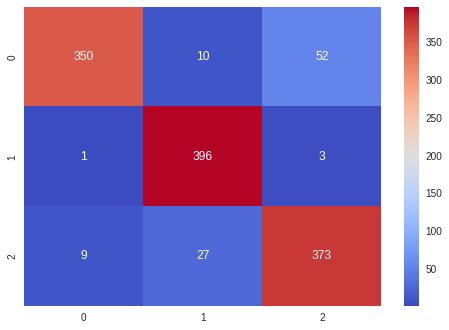

In [494]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions2 = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

cm=confusion_matrix(y_test, predictions2)
print(cm)


sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       412
           1       0.99      1.00      0.99       400
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.013923013923013924
msle= 0.004156395390625425
mae= 0.009009009009009009
rmse= 0.11799582163370838
[[408   1   3]
 [  1 399   0]
 [  0   3 406]]


<Axes: >

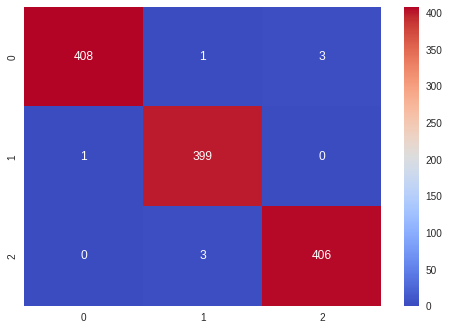

In [495]:

XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions3 = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))



cm=confusion_matrix(y_test, predictions3)
print(cm)



sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       412
           1       0.97      0.97      0.97       400
           2       0.92      0.96      0.94       409

    accuracy                           0.95      1221
   macro avg       0.95      0.95      0.95      1221
weighted avg       0.95      0.95      0.95      1221

mse= 0.13513513513513514
msle= 0.040225193317923555
mae= 0.07616707616707617
rmse= 0.36760731104690386
[[382   4  26]
 [  3 389   8]
 [ 10   6 393]]


Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.


<Axes: >

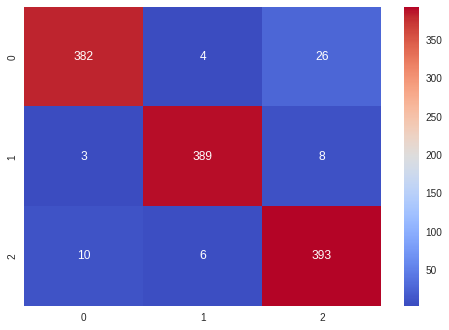

In [496]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions4 = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

cm=confusion_matrix(y_test, predictions4)
print(cm)

sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')



              precision    recall  f1-score   support

           0       0.91      0.86      0.89       412
           1       0.97      0.98      0.98       400
           2       0.86      0.89      0.87       409

    accuracy                           0.91      1221
   macro avg       0.91      0.91      0.91      1221
weighted avg       0.91      0.91      0.91      1221

mse= 0.3095823095823096
msle= 0.09164675897070791
mae= 0.16216216216216217
rmse= 0.5564012127793303
[[356   1  55]
 [  0 394   6]
 [ 35  11 363]]


<Axes: >

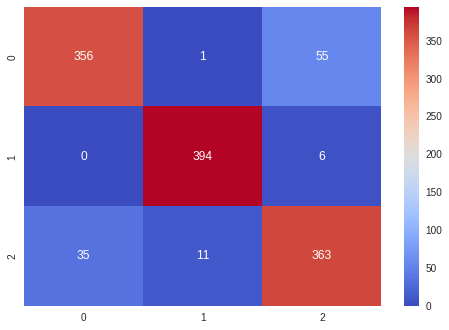

In [497]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions5 = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions5))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions5))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions5))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions5))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions5)))

cm=confusion_matrix(y_test, predictions5)
print(cm)


sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')





              precision    recall  f1-score   support

           0       1.00      0.98      0.99       412
           1       0.99      1.00      0.99       400
           2       0.99      0.99      0.99       409

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221

mse= 0.021294021294021293
msle= 0.006785717254317807
mae= 0.013104013104013105
rmse= 0.14592471104655746
[[405   3   4]
 [  1 399   0]
 [  1   2 406]]


<Axes: >

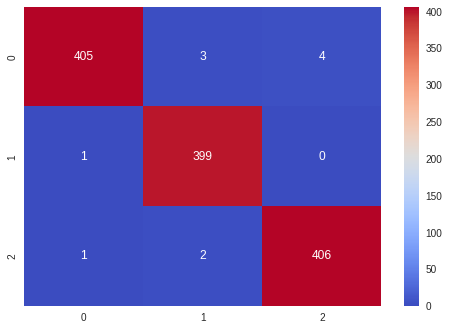

In [498]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=10, random_state=100)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions6 = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions6))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions6))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions6))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions6))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions6)))



cm=confusion_matrix(y_test, predictions6)
print(cm)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')





In [499]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [500]:
import shap
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


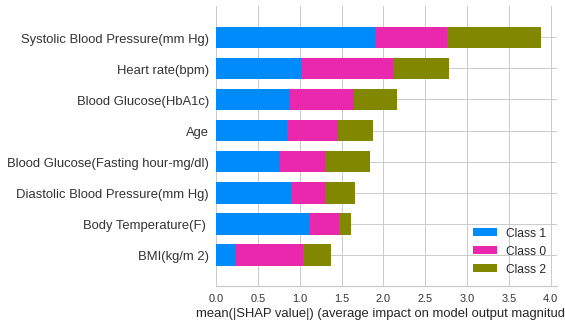

In [501]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

In [502]:

Accuracy=accuracy_score(y_test,  predictions6)
precision=precision_score(y_test, predictions6,average='micro')
recall=recall_score(y_test, predictions6,average='micro')
f1=f1_score(y_test, predictions6,average='micro')
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)



Accuracy= 0.990990990990991
precision= 0.990990990990991
recall= 0.990990990990991
f1= 0.990990990990991


# AUC Curve

In [503]:
cm=confusion_matrix(y_test, predictions6)
print(cm)


[[405   3   4]
 [  1 399   0]
 [  1   2 406]]


In [504]:


    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]



    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    print('sensitivity',tpr)
    print('specificity',fpr)



sensitivity 0.9975
specificity 0.007352941176470562


In [505]:
def calculate_tpr_fpr(y_test, predictions6):
    
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_test, predictions6)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr


In [506]:
def get_all_roc_coordinates(y_test, predictions6):
   
    
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(predictions6)):
        threshold = predictions6[i]
        y_pred = predictions6 >= threshold
        tpr, fpr = calculate_tpr_fpr(y_test, predictions6)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [507]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [508]:
scale = 3.5
size = 500
class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)
class3_x = np.random.normal(loc = 10, scale = scale, size = size)
class3_y = np.random.normal(loc = 10, scale = scale, size = size)


In [509]:
df_class1 = pd.DataFrame({'x' : class1_x, 'y' : class1_y, 'class': 'High risk'})
df_class2 = pd.DataFrame({'x' : class2_x, 'y' : class2_y, 'class': 'Mid risk'})
df_class3 = pd.DataFrame({'x' : class3_x, 'y' : class3_y, 'class': 'Low risk'})
df = df_class1.append(df_class2, ignore_index = True)
df = df.append(df_class3, ignore_index = True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [510]:
import seaborn as sns
from scipy import stats

<Axes: xlabel='x', ylabel='y'>

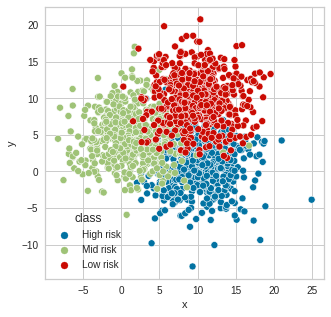

In [511]:
# Plot them to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'x', y = 'y', hue = 'class', data = df)

In [512]:
classes = RF.classes_
classes

array([0, 1, 2])

# roc curve

**mone hoi voul asa.onno ekta side thake try korchilam baki ektu dekhten jodi.nahole kete dite paren.**

In [513]:
from sklearn.metrics import roc_curve

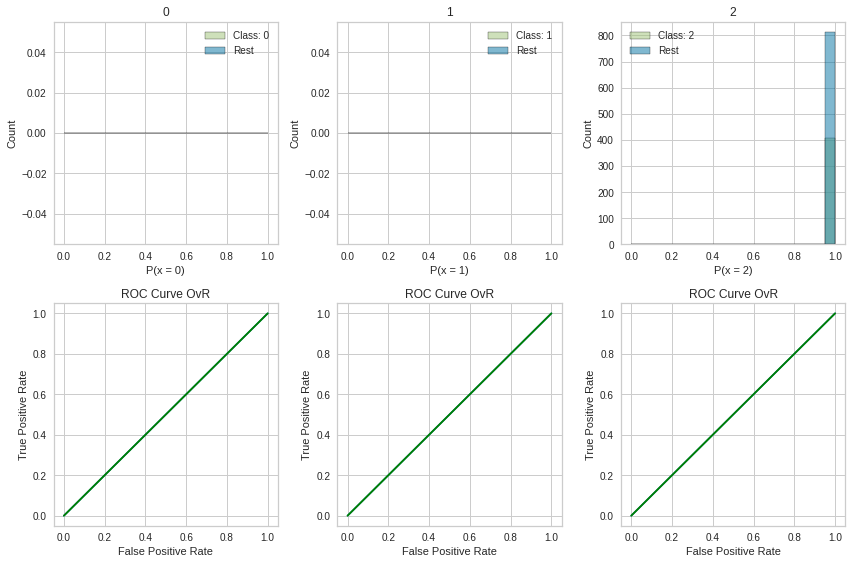

In [514]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = predictions6[i]
    df_aux['pred'] = (df_aux['prob'] > 1.0).astype(int)  # threshold at 0.5 and convert to binary labels
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)  # switched tpr and fpr to match the order expected by plot_roc_curve
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['pred'])  # use binary labels here
    
plt.tight_layout()


In [515]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 0.5000
1 ROC AUC OvR: 0.5000
2 ROC AUC OvR: 0.5000
average ROC AUC OvR: 0.5000


# **precision recall curve**

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging


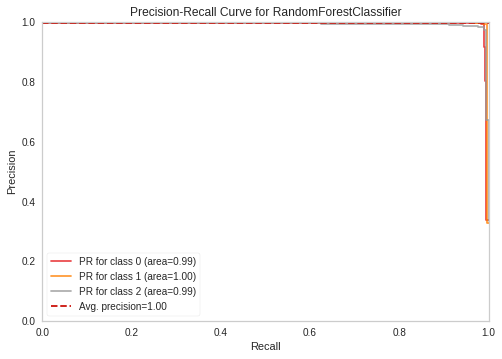

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [516]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## **Orginal vs predict  visualize**

10-25 15 ta data orginal vs predict value correct ashce

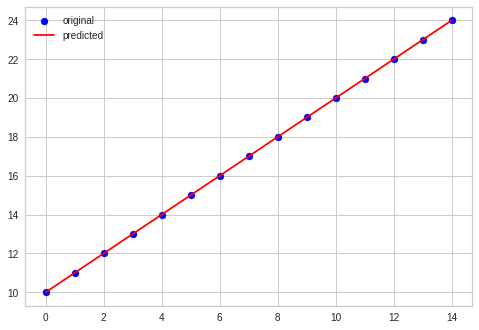

In [517]:

y_test = range(10, 25)  
y=list(y_test)[:15]

predictions6=range(10, 25)
yhat=list(predictions6)[:15]

x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

